In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from urllib.error import HTTPError
import csv
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_city_weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lats = []
lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#Create data frame with lat and lngs to iterate through
cities_df = pd.DataFrame({"City":"","Latitude": lats, "Longitude": lngs,})


# Identify nearest city for each lat, lng combination
for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row['Latitude'], row['Longitude'])
    cities_df.at[index,"City"] = (f"{city.city_name},{city.country_code}")
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Get rid of any duplicates
cities_df = cities_df.drop_duplicates(["City"], keep='first')
cities_df = cities_df.reset_index(drop=True)

# Print the city count to confirm sufficient count
len(cities_df)

#removing duplicates
cities_df = cities_df.drop_duplicates(["City"], keep='first')
cities_df = cities_df.reset_index(drop=True)

cities_df.count()
cities_df.head()

,City,Latitude,Longitude
0,"punta arenas,cl",-81.549587,-108.259616
1,"angoche,mz",-17.438868,42.173997
2,"ola,ru",57.184229,151.671896
3,"jamestown,sh",-23.821111,-13.073334
4,"albany,au",-55.393713,122.629395


## Perform API Calls

In [28]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

city1 = "London,uk"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

query_url = url + "&q=" + city1

In [29]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()

print(weather_json)

{'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 45.16, 'pressure': 1023, 'humidity': 76, 'temp_min': 41, 'temp_max': 50}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 220}, 'clouds': {'all': 0}, 'dt': 1538949000, 'sys': {'type': 1, 'id': 5091, 'message': 0.0047, 'country': 'GB', 'sunrise': 1538892741, 'sunset': 1538932976}, 'id': 2643743, 'name': 'London', 'cod': 200}


In [30]:
#settings parameters
settings = {"units": "imperial", "appid": api_key}

#data we want to collect from our requests
params = ['name','sys.country','dt','clouds.all','main.humidity','main.temp','wind.speed']

for index, row in cities_df.iterrows():
    try:
        city = row['City']
        data = owm.get_current(city, **settings)
        results = data(*params)
        cities_df.at[index, 'City'] = (results[0])
        cities_df.at[index, 'Country'] = (results[1])
        cities_df.at[index, 'Date'] = (results[2])
        cities_df.at[index, 'Cloudiness'] = (int(results[3]))
        cities_df.at[index, 'Humidity'] = (results[4])
        cities_df.at[index, 'Temp'] = (results[5])
        cities_df.at[index, 'Wind Speed'] = (results[6])
        print(f"Retrieving results for index {index}: {city}.")
    except (KeyError, IndexError, HTTPError): 
        print("Missing field/result... skipping.")
        pass
    print("----------------------")
    

Retrieving results for index 0: punta arenas,cl.
----------------------
Retrieving results for index 1: angoche,mz.
----------------------
Retrieving results for index 2: ola,ru.
----------------------
Retrieving results for index 3: jamestown,sh.
----------------------
Retrieving results for index 4: albany,au.
----------------------
Retrieving results for index 5: bluff,nz.
----------------------
Retrieving results for index 6: butaritari,ki.
----------------------
Retrieving results for index 7: whitefish,us.
----------------------
Missing field/result... skipping.
----------------------
Retrieving results for index 9: hobart,au.
----------------------
Retrieving results for index 10: boa vista,br.
----------------------
Retrieving results for index 11: castro,cl.
----------------------
Retrieving results for index 12: dingzhou,cn.
----------------------
Retrieving results for index 13: kalmunai,lk.
----------------------
Missing field/result... skipping.
----------------------
Retr

Retrieving results for index 121: ushuaia,ar.
----------------------
Retrieving results for index 122: port hardy,ca.
----------------------
Retrieving results for index 123: new norfolk,au.
----------------------
Retrieving results for index 124: kyshtovka,ru.
----------------------
Retrieving results for index 125: tinskoy,ru.
----------------------
Retrieving results for index 126: norman wells,ca.
----------------------
Missing field/result... skipping.
----------------------
Retrieving results for index 128: karratha,au.
----------------------
Missing field/result... skipping.
----------------------
Retrieving results for index 130: mackay,au.
----------------------
Retrieving results for index 131: mount isa,au.
----------------------
Missing field/result... skipping.
----------------------
Retrieving results for index 133: kodiak,us.
----------------------
Retrieving results for index 134: faanui,pf.
----------------------
Retrieving results for index 135: hofn,is.
-------------

Retrieving results for index 240: zhucheng,cn.
----------------------
Retrieving results for index 241: nizhniy kuranakh,ru.
----------------------
Retrieving results for index 242: provideniya,ru.
----------------------
Retrieving results for index 243: lavrentiya,ru.
----------------------
Retrieving results for index 244: newport,us.
----------------------
Retrieving results for index 245: ust-nera,ru.
----------------------
Retrieving results for index 246: goundam,ml.
----------------------
Retrieving results for index 247: coihaique,cl.
----------------------
Retrieving results for index 248: shingu,jp.
----------------------
Retrieving results for index 249: hibbing,us.
----------------------
Retrieving results for index 250: leiyang,cn.
----------------------
Retrieving results for index 251: gornopravdinsk,ru.
----------------------
Retrieving results for index 252: ostrovnoy,ru.
----------------------
Missing field/result... skipping.
----------------------
Retrieving results

Retrieving results for index 363: nago,jp.
----------------------
Retrieving results for index 364: ilhabela,br.
----------------------
Missing field/result... skipping.
----------------------
Retrieving results for index 366: necochea,ar.
----------------------
Retrieving results for index 367: rostock,de.
----------------------
Retrieving results for index 368: pevek,ru.
----------------------
Retrieving results for index 369: dwarka,in.
----------------------
Retrieving results for index 370: tual,id.
----------------------
Retrieving results for index 371: panalingaan,ph.
----------------------
Retrieving results for index 372: kahului,us.
----------------------
Retrieving results for index 373: arlit,ne.
----------------------
Retrieving results for index 374: saldanha,za.
----------------------
Retrieving results for index 375: kousseri,cm.
----------------------
Retrieving results for index 376: huilong,cn.
----------------------
Retrieving results for index 377: wewak,pg.
-----

Retrieving results for index 482: lakitelek,hu.
----------------------
Retrieving results for index 483: mehamn,no.
----------------------
Retrieving results for index 484: abu dhabi,ae.
----------------------
Retrieving results for index 485: nsanje,mw.
----------------------
Retrieving results for index 486: ugoofaaru,mv.
----------------------
Retrieving results for index 487: baruun-urt,mn.
----------------------
Retrieving results for index 488: kodinsk,ru.
----------------------
Retrieving results for index 489: koumac,nc.
----------------------
Retrieving results for index 490: husavik,is.
----------------------
Missing field/result... skipping.
----------------------
Retrieving results for index 492: tromso,no.
----------------------
Retrieving results for index 493: sungaipenuh,id.
----------------------
Retrieving results for index 494: comodoro rivadavia,ar.
----------------------
Retrieving results for index 495: north bend,us.
----------------------
Missing field/result...

In [31]:
#Drop the nulls and count total number of cities in dataframe
cities_df = cities_df.dropna(how='any')
cities_df.count()

City          520
Latitude      520
Longitude     520
Country       520
Date          520
Cloudiness    520
Humidity      520
Temp          520
Wind Speed    520
dtype: int64

In [32]:
cities_df.head()

,City,Latitude,Longitude,Country,Date,Cloudiness,Humidity,Temp,Wind Speed
0,Punta Arenas,-81.549587,-108.259616,CL,1.538950e+09,40.0,91.0,42.80,19.46
1,Angoche,-17.438868,42.173997,MZ,1.538951e+09,92.0,100.0,76.93,18.16
2,Ola,57.184229,151.671896,RU,1.538948e+09,0.0,85.0,23.00,4.47
3,Jamestown,-23.821111,-13.073334,SH,1.538951e+09,92.0,100.0,68.11,12.68
4,Albany,-55.393713,122.629395,AU,1.538951e+09,64.0,93.0,48.22,3.62


In [44]:
#converting our cities dataframe to csv output
cities_df.to_csv(output_data_file)

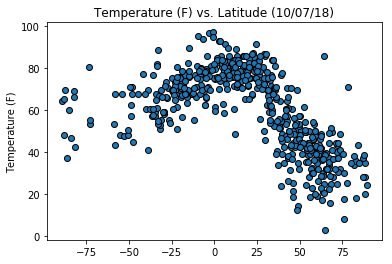

In [57]:
#dates
date = datetime.now()
today = date.strftime("%m/%d/%y")

plt.scatter(x=cities_df['Latitude'], y=cities_df['Temp'], marker="o", 
            data=cities_df, 
            alpha=1, linewidths=1, edgecolor = 'k')

plt.title(f"Temperature (F) vs. Latitude ({today})")
plt.ylabel("Temperature (F)")

#Save file as PNG
plt.savefig('LatitudeVsTemp.png')

#Show Plot
plt.show()


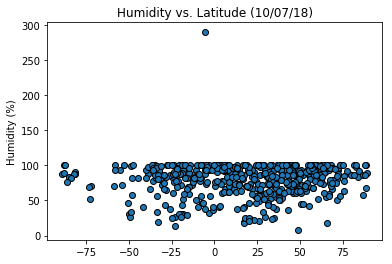

In [59]:
plt.scatter(x=cities_df['Latitude'], y=cities_df['Humidity'], marker="o", 
            data=cities_df, 
            alpha=1, linewidths=1, edgecolor = 'k')

plt.title(f"Humidity vs. Latitude ({today})")
plt.ylabel("Humidity (%)")

#Save file as PNG
plt.savefig('LatitudeVsHumidity.png')

#Show Plot
plt.show()

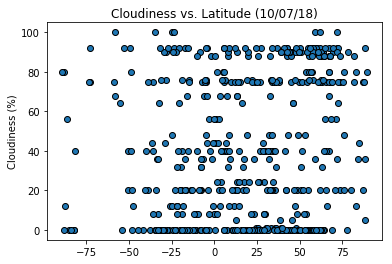

In [60]:
plt.scatter(x=cities_df['Latitude'], y=cities_df['Cloudiness'], marker="o", 
            data=cities_df, 
            alpha=1, linewidths=1, edgecolor = 'k')

plt.title(f"Cloudiness vs. Latitude ({today})")
plt.ylabel("Cloudiness (%)")

#Save file as PNG
plt.savefig('LatitudeVsCloudiness.png')

#Show Plot
plt.show()

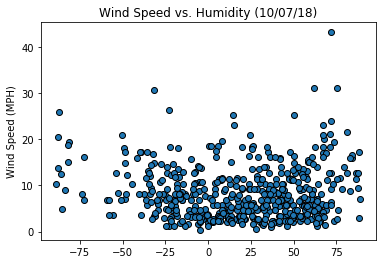

In [61]:
plt.scatter(x=cities_df['Latitude'], y=cities_df['Wind Speed'], marker="o", 
            data=cities_df, 
            alpha=1, linewidths=1, edgecolor = 'k')

plt.title(f"Wind Speed vs. Humidity ({today})")
plt.ylabel("Wind Speed (MPH)")

#Save file as PNG
plt.savefig('LatitudeVsWindSpeed.png')

#Show Plot
plt.show()